In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1. Leer el dataFrame housing cvs

In [2]:
path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(f"{path}")

2. Entender el estado de los datos, para ello puede emplear los comandos básicos del pandas

In [3]:
df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

3. Determinar las columnas únicas asociadas a columna ocean_proximity

In [8]:
df1 = df["ocean_proximity"].unique()
df1

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value","ocean_proximity"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

In [9]:
cols = ["housing_median_age",    "total_rooms",    "total_bedrooms",    "population",    "households",    "median_income",    "median_house_value","ocean_proximity"]


In [10]:
df2 = df.groupby("ocean_proximity")

In [11]:
df3 = df2[cols].mean()
df3

<ipython-input-11-bd38527f6bfe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df2[cols].mean()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


5. Construya un histograma para cada columna, puede emplear la librería seaborn. (incluye el 9)

In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

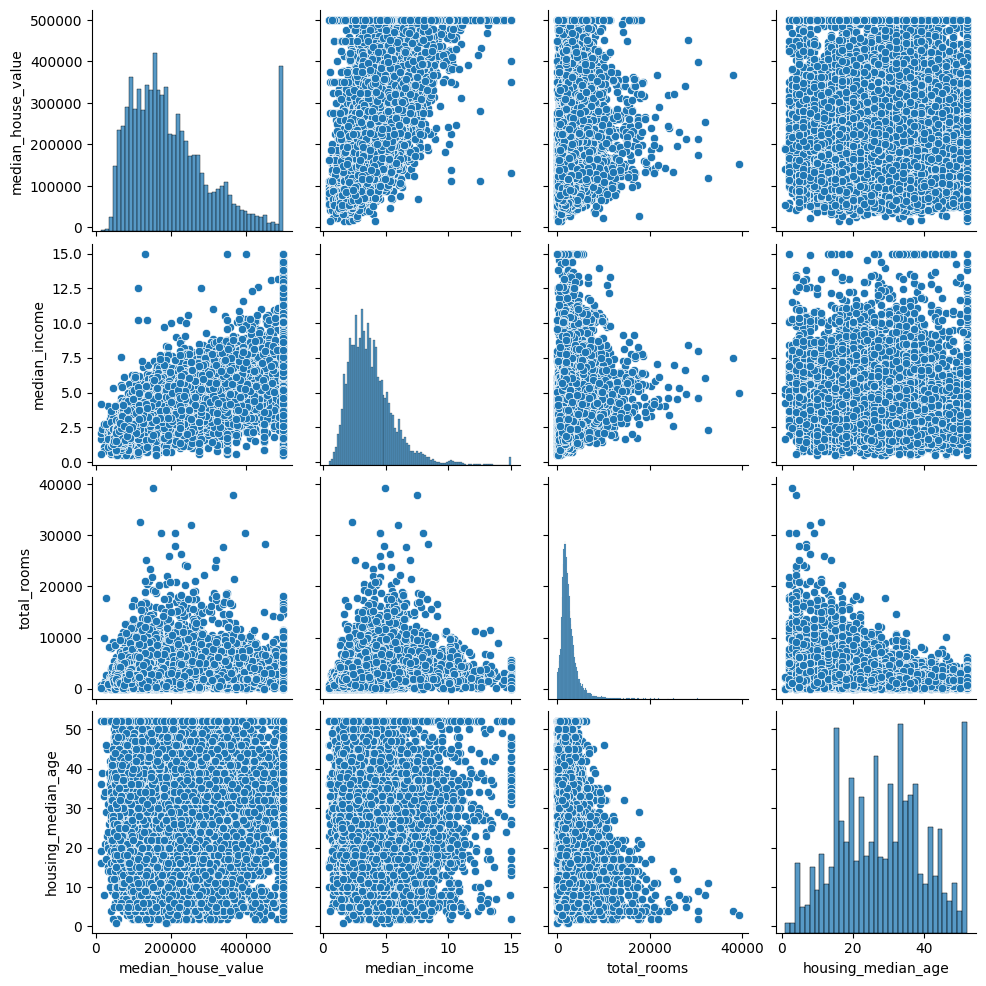

In [13]:
#sns.histplot(data=df['longitude'])
df4 = df[["median_house_value", "median_income","total_rooms", "housing_median_age"]]
sns.pairplot(df4)

8. Determinar la matriz de correlación

<ipython-input-14-0c1be30977ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


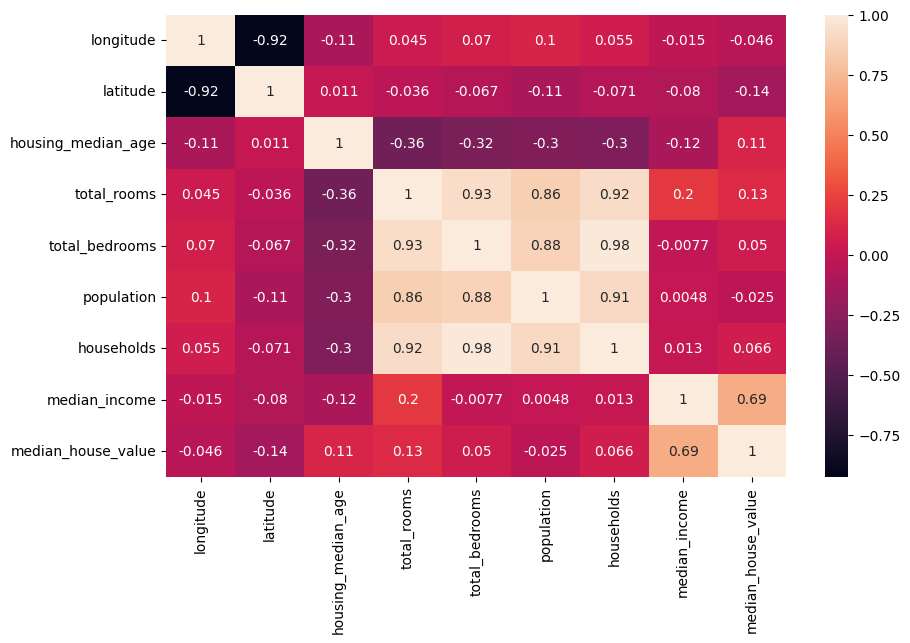

In [14]:
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

9. Realizar un scatter plot con la librería seaborn, el color del grafico puede ser empleado con la columnda median_house_value.

<Axes: xlabel='longitude', ylabel='latitude'>

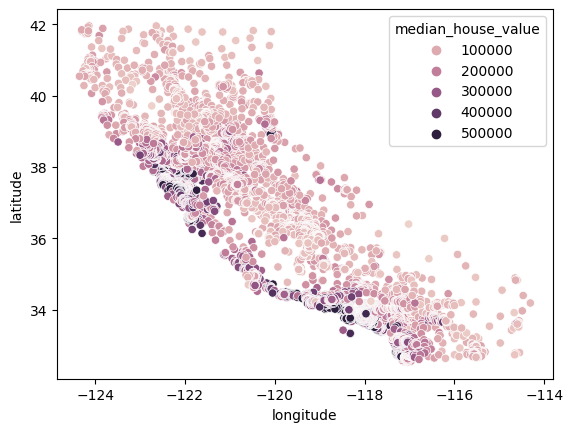

In [15]:
sns.scatterplot(data = df, x="longitude", y="latitude", hue="median_house_value")


10. ¿La siguiente línea es adecuada para separar el dataframe en datos de entrenamiento y de test? ¿Qué pasa en la división de los datos?

Esto se debe justificar con base en stratified sampling

In [16]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(len(train_set))
print(len(test_set))

16512
4128


11. División del dataset en grupos:

La siguiente división puede ser realizada basada en la experticie de lo que se está analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

<Axes: >

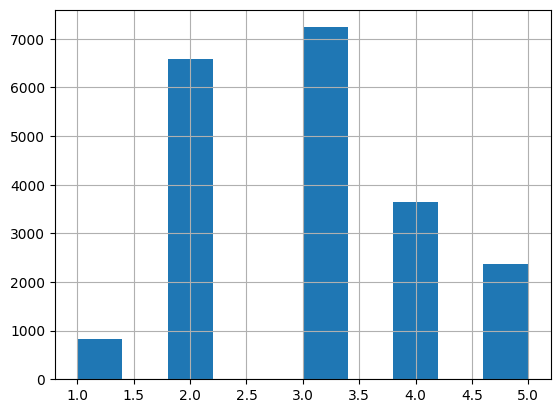

In [17]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df.income_cat.hist()


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42) # hace el stratified de forma eficaz

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [52]:
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

3    0.348716
2    0.324188
4    0.173147
5    0.114159
1    0.039789
Name: income_cat, dtype: float64

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set), # cantidad de datos aleatorios para testear tomo:
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

In [27]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


In [22]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [23]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```



In [30]:
'''
  Aca el comando me dice que en total bedrooms y en bedrooms_per_room
  hay 207 Nan
'''
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [41]:
nan_positions = df['total_bedrooms'].isna()
df[nan_positions]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,3,4.646983,NaN,4.070603
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,2,3.140420,NaN,2.543307
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,4,6.367713,NaN,2.542601
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,5,6.771499,NaN,3.358722


In [47]:
median = df["total_bedrooms"].median()
print(f'Criterio bajo la media {median} para reemplazar los Nan.')
q=df["total_bedrooms"].fillna(median).copy()

q=pd.DataFrame(q)

q.isnull().sum()

Criterio bajo la media 435.0 para reemplazar los Nan.


total_bedrooms    0
dtype: int64

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):




In [50]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [48]:
from sklearn.impute import SimpleImputer

df_train_num = df.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05,  3.00668605e+00,  5.42899974e+00,  2.13038830e-01,
        3.07065516e+00])

In [54]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

In [55]:
housing_tr # dataset completo, de aca deberia sacar los datos de train y test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0,5.329513,0.219892,2.123209


In [57]:
from sklearn.preprocessing import OneHotEncoder
df["ocean_proximity"].unique()
housing_cat=df[["ocean_proximity"]]
housing_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [58]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [59]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

In [60]:
housing_tr_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0
